Walmart Sales Forecasting Dataset https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data Walmart Sales Dataset You are hired as a Junior Data Analyst at Walmart.

Your job is to analyze sales patterns across stores and departments to help management make data-driven decisions. You are given multiple datasets (features.csv, sales.csv, stores.csv).

You must merge and analyze them to extract useful insights. Walmart Recruiting - Store Sales Forecasting Use historical markdown data to predict store sales

Task 1 — Data Loading, Merging & Initial Inspection Load all required CSV files into your notebook. Merge them into one dataset using Store, Dept, and Date. Display the first and last 10 rows. Print: .shape .info() .describe() Identify: Numerical columns Categorical columns Date columns List all unique store types and departments. 7. Identify which columns may require cleaning or type conversion

In [28]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read CSVs
features = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')

# quick peek
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [36]:
df = pd.merge(train, features, on=["Store", "Date"], how="left")
df = pd.merge(df, stores, on="Store", how="left")

print(df.head())
print(df.info())
print(df.describe())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  1

In [33]:
print("Train columns:", train.columns.tolist())
print("Features columns:", features.columns.tolist())


Train columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
Features columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


In [37]:
#Task 2 — Data Cleaning & Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary (example: MarkDown columns)
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    df[col].fillna(0, inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


C:\Users\lekha\AppData\Local\Temp\ipykernel_12064\3738790641.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


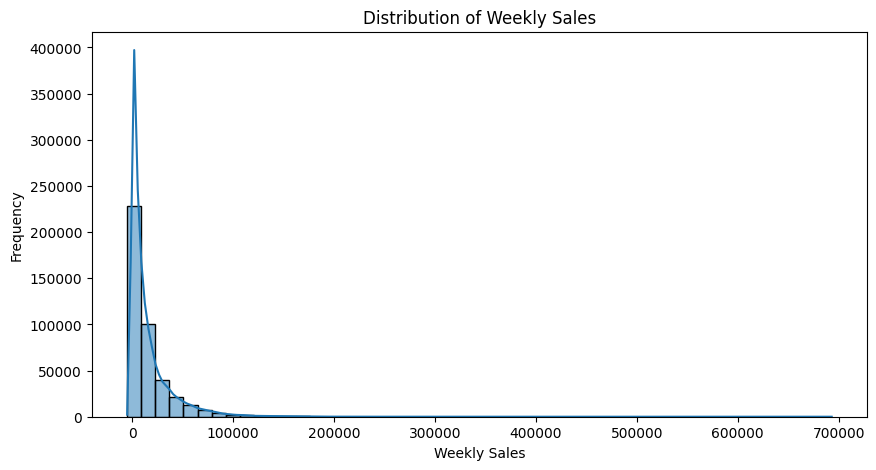

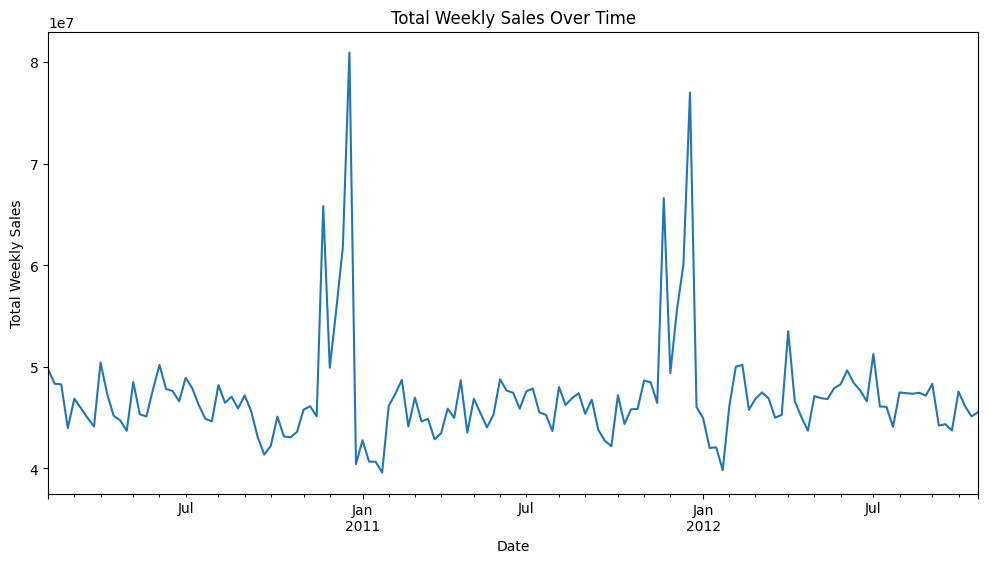

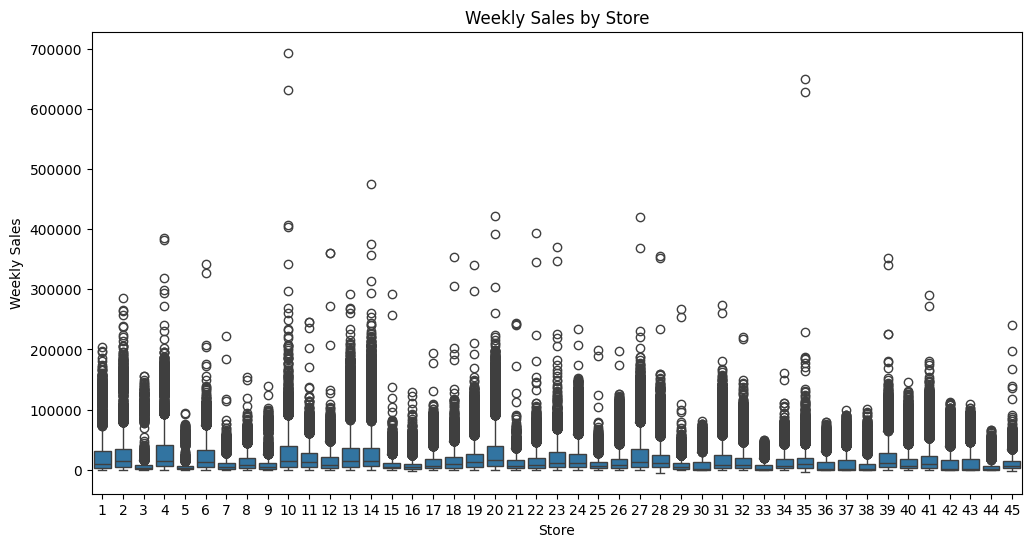

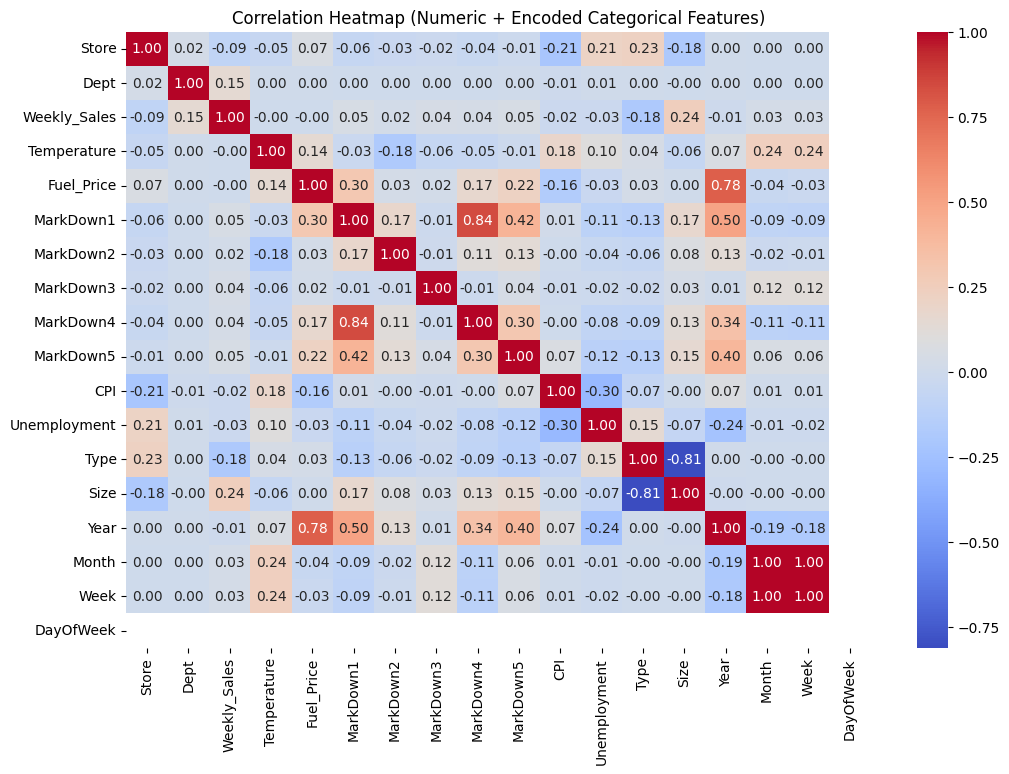

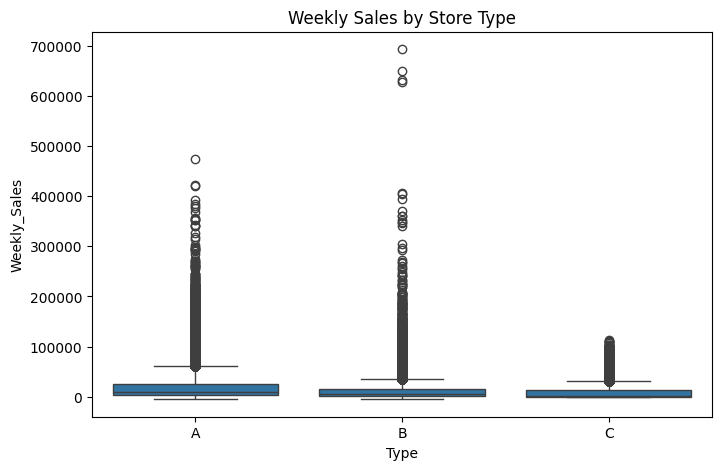

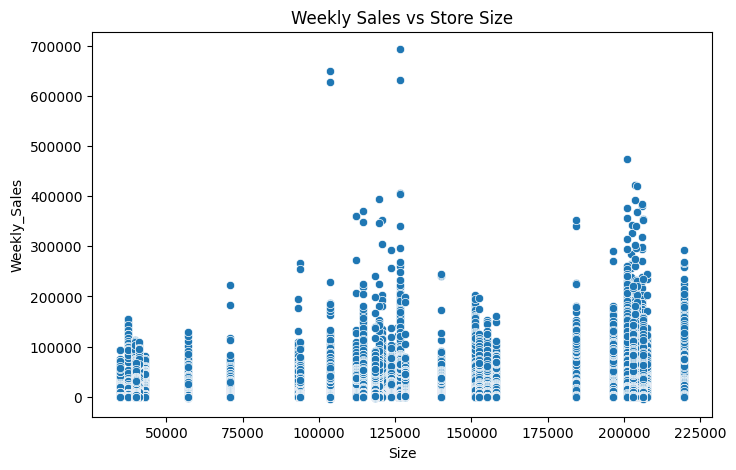

In [40]:

#1️.Distribution of Weekly Sales
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

#2.Total Sales Over Time
plt.figure(figsize=(12,6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

#3️ Sales by Store (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

#4.Encode categorical columns for correlation
df_corr = df.copy()
categorical_cols = ['Type']  # Add other categorical columns if needed
for col in categorical_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

#5.Correlation Heatmap (numeric + encoded categorical)
numeric_df = df_corr.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric + Encoded Categorical Features)')
plt.show()

#6️.Sales by Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store Type')
plt.show()

#7️.Sales vs Size
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Store Size')
plt.show()


C:\Users\lekha\AppData\Local\Temp\ipykernel_12064\2395309780.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rolling_Mean_3'].fillna(df['Weekly_Sales'].median(), inplace=True)


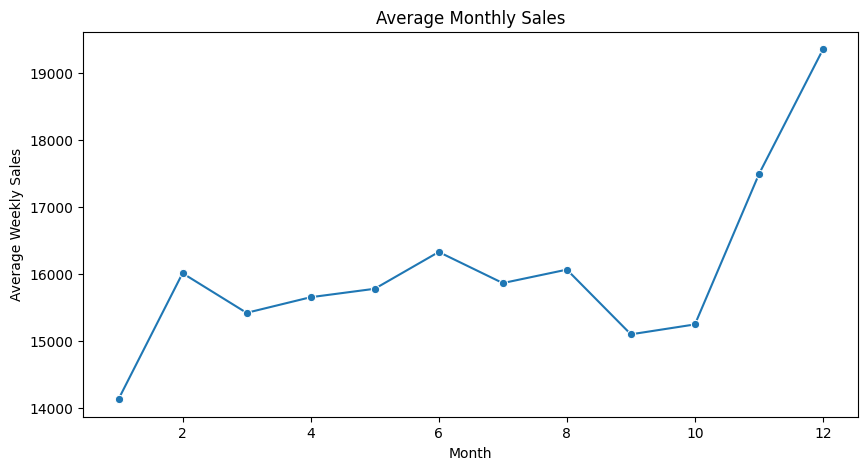

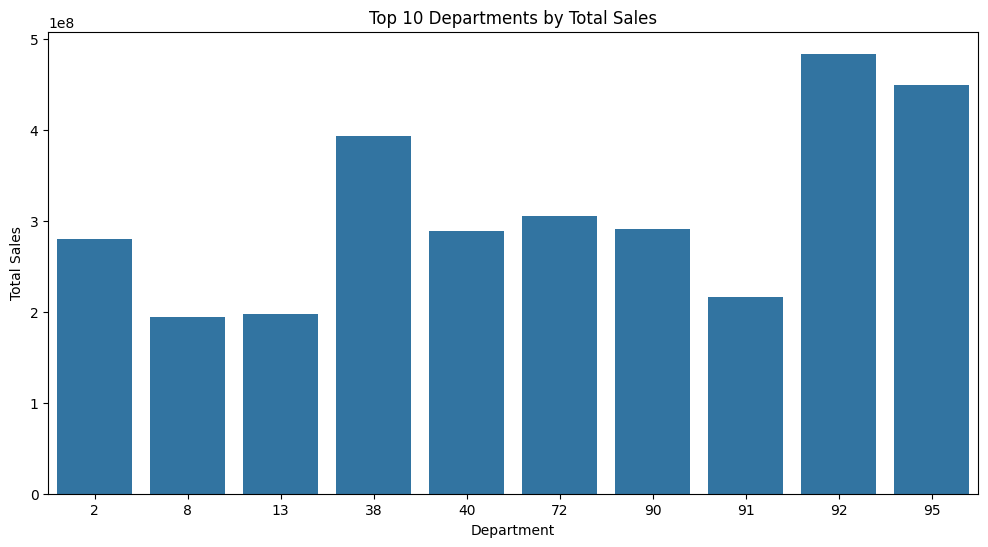

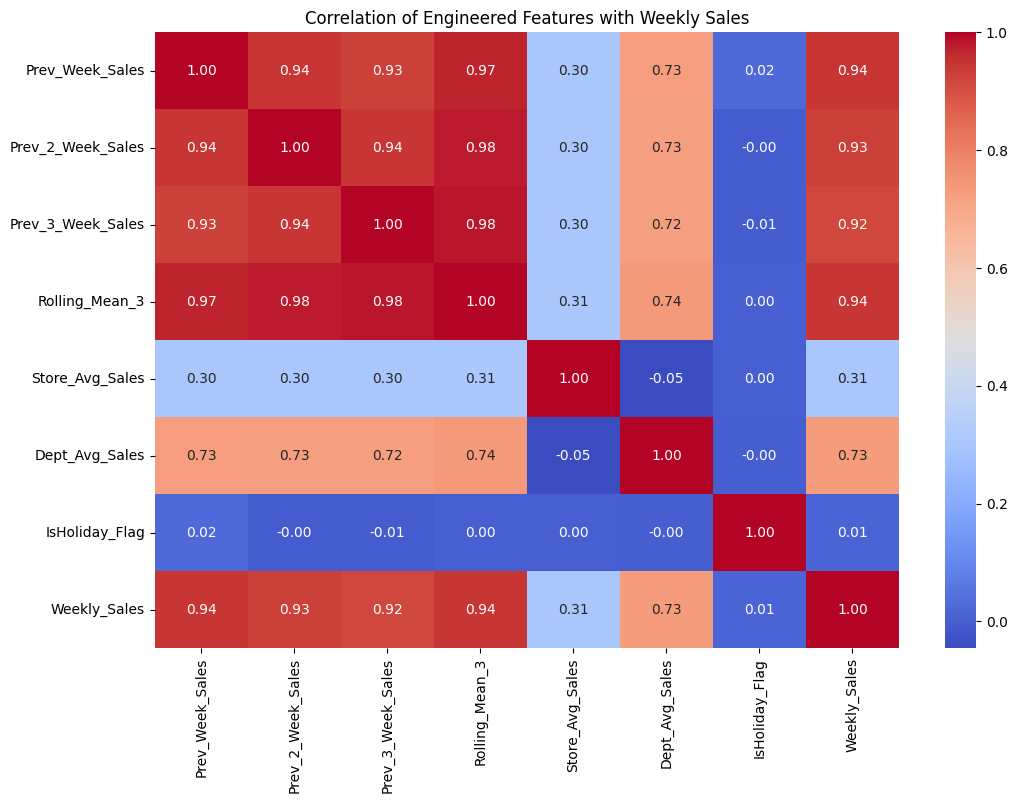

In [42]:
#Task-4
#1.Ready dataset
df['IsHoliday_Flag'] = df['IsHoliday_x'].astype(int)

#2.Lag Features
df = df.sort_values(by=['Store','Dept','Date'])
df['Prev_Week_Sales'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df['Prev_2_Week_Sales'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)
df['Prev_3_Week_Sales'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(3)
df[['Prev_Week_Sales','Prev_2_Week_Sales','Prev_3_Week_Sales']] = df[['Prev_Week_Sales','Prev_2_Week_Sales','Prev_3_Week_Sales']].fillna(df['Weekly_Sales'].median())

#3.Rolling Mean
df['Rolling_Mean_3'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(3).mean())
df['Rolling_Mean_3'].fillna(df['Weekly_Sales'].median(), inplace=True)

#4.Average Sales per Store & Dept
store_avg = df.groupby('Store')['Weekly_Sales'].mean().to_dict()
dept_avg = df.groupby('Dept')['Weekly_Sales'].mean().to_dict()
df['Store_Avg_Sales'] = df['Store'].map(store_avg)
df['Dept_Avg_Sales'] = df['Dept'].map(dept_avg)

#5.Month-wise sales trend
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

#6.Dept-wise top performers
top_depts = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_depts.index, y=top_depts.values)
plt.title('Top 10 Departments by Total Sales')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()

#7.Feature Correlation Check
engineered_cols = ['Prev_Week_Sales','Prev_2_Week_Sales','Prev_3_Week_Sales','Rolling_Mean_3','Store_Avg_Sales','Dept_Avg_Sales','IsHoliday_Flag']
plt.figure(figsize=(12,8))
sns.heatmap(df[engineered_cols + ['Weekly_Sales']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation of Engineered Features with Weekly Sales')
plt.show()


✅ Task 5 — Bivariate Analysis Study the relationship between two variables: Relationship between Temperature & Weekly Sales (scatter plot). Relationship between Fuel Price & Weekly Sales. Weekly Sales vs. Store Type. Weekly Sales vs. Holiday_Flag. Compare sales between: Top-performing store Lowest-performing store ✅ Task 6 — Multivariate Analysis Analyze more than two variables together: Create a correlation heatmap for all numeric features. Analyze store-level sales using: Store Type Store Size Weekly Sales Multivariate relationship: Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary) Analyze whether discount markdowns influence sales when considering: Date Holiday weeks Markdown values ✅ Task 7 — Time Series Analysis Convert Date to: Year Month Week Plot total weekly sales over time. Plot monthly sales trends for: Store with highest sales Store with lowest sales Identify seasonal patterns: Which months show peak sales? Which departments show seasonal demand? 🔥 Task 8 — Feature Engineering Task 8A — Create New Columns year, month, week → from date. discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 is_peak_season → True if month in {11, 12}. normalized_sales = Weekly_Sales / Size Task 8B — Filter Using Created Columns Show all peak-season transactions where weekly_sales > 50,000. Show all stores whose normalized_sales is in the top 10% percentile. Show departments where discount_effect > median discount. Filter rows where: Temperature < 40 Fuel price > 3.5 Weekly sales between 20,000 and 60,000 is_peak_season = True Task 8C — Grouping & Business Insights Monthly average sales per store. Total discount_effect per department. Department with highest normalized_sales. Compute store-wise revenue potential: revenue_potential = Weekly_Sales * 52 Identify top 10 stores based on revenue potential.


Task 5: Bivariate Analysis


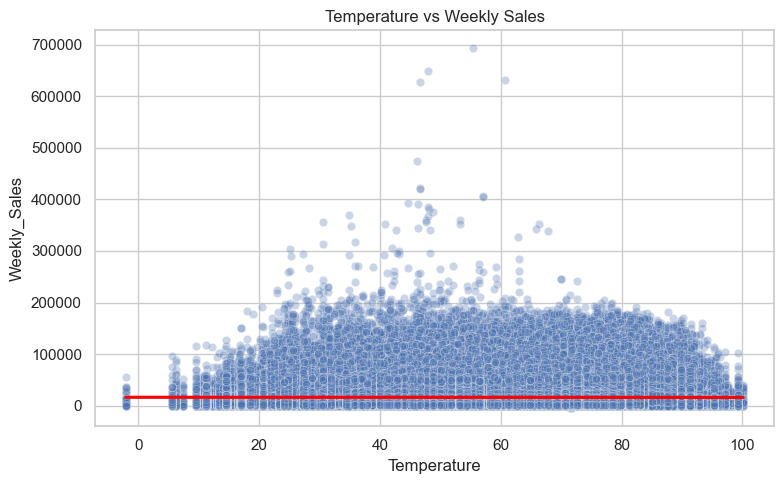

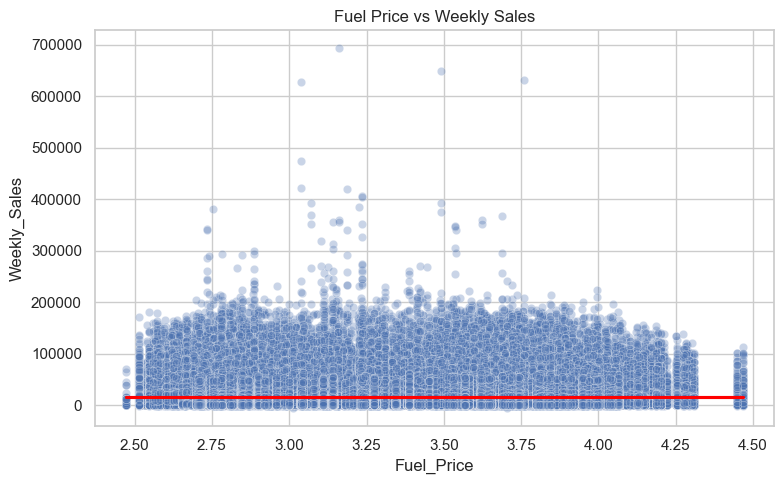

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
if 'df' not in globals():
    raise NameError("DataFrame 'df' not found. Load/merge sales, features, stores into df before running this cell.")
required_cols = set(df.columns)
def safe_plot_show():
    try:
        plt.show()
    except Exception:
        pass
print("\nTask 5: Bivariate Analysis")

# 1) Temperature vs Weekly_Sales (scatter + linear fit)
if {'Temperature','Weekly_Sales'}.issubset(required_cols):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.3)
    sns.regplot(data=df, x='Temperature', y='Weekly_Sales', scatter=False, color='red')
    plt.title('Temperature vs Weekly Sales')
    plt.tight_layout()
    safe_plot_show()
else:
    print("Skip: Missing Temperature or Weekly_Sales.")

# 2) Fuel_Price vs Weekly_Sales
if {'Fuel_Price','Weekly_Sales'}.issubset(required_cols):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', alpha=0.3)
    sns.regplot(data=df, x='Fuel_Price', y='Weekly_Sales', scatter=False, color='red')
    plt.title('Fuel Price vs Weekly Sales')
    plt.tight_layout()
else:
    print("Skip: Missing Fuel_Price or Weekly_Sales.")

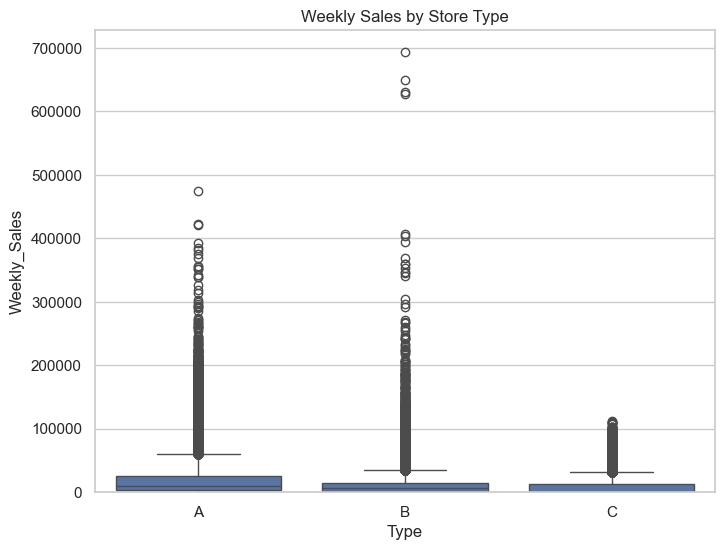

In [3]:
if 'Type' in df.columns and 'Weekly_Sales' in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Type', y='Weekly_Sales', data=df)
    plt.title('Weekly Sales by Store Type')
    plt.ylim(bottom=0)
    plt.show()

In [4]:
if 'IsHoliday' in df.columns and 'Weekly_Sales' in df.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
    plt.title('Weekly Sales by Holiday Flag')
    plt.show()

Top store: 20 Avg weekly sales: 29508.30159193264
Lowest store: 5 Avg weekly sales: 5053.4158128680965


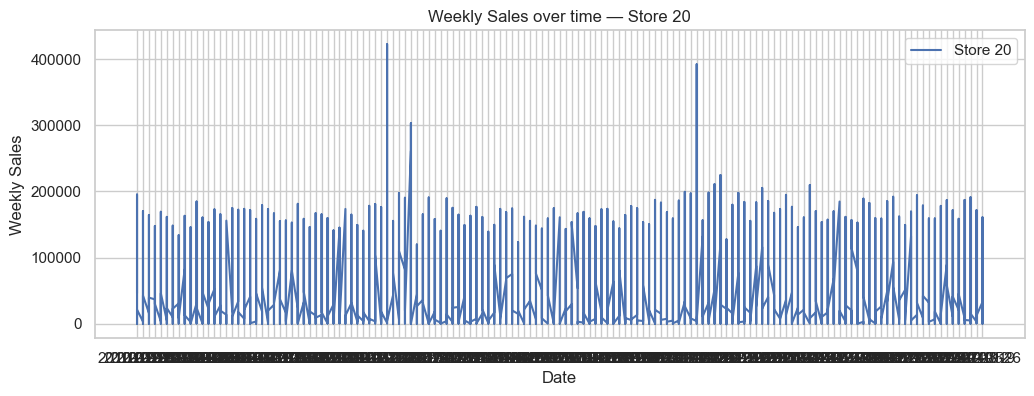

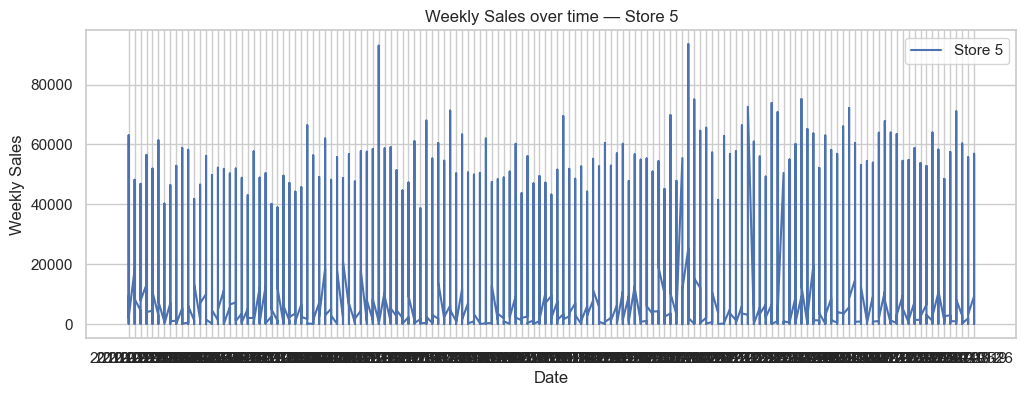

In [5]:
if 'Store' in df.columns and 'Weekly_Sales' in df.columns:
    store_avg = df.groupby('Store')['Weekly_Sales'].mean()
    top_store = store_avg.idxmax()
    low_store = store_avg.idxmin()
    print("Top store:", top_store, "Avg weekly sales:", store_avg.max())
    print("Lowest store:", low_store, "Avg weekly sales:", store_avg.min())

    # plot time series for the two stores
    for s in [top_store, low_store]:
        sub = df[df['Store'] == s].sort_values('Date')
        plt.figure(figsize=(12,4))
        plt.plot(sub['Date'], sub['Weekly_Sales'], label=f'Store {s}')
        plt.title(f'Weekly Sales over time — Store {s}')
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.legend()
        plt.show()


Task 6: Multivariate Analysis


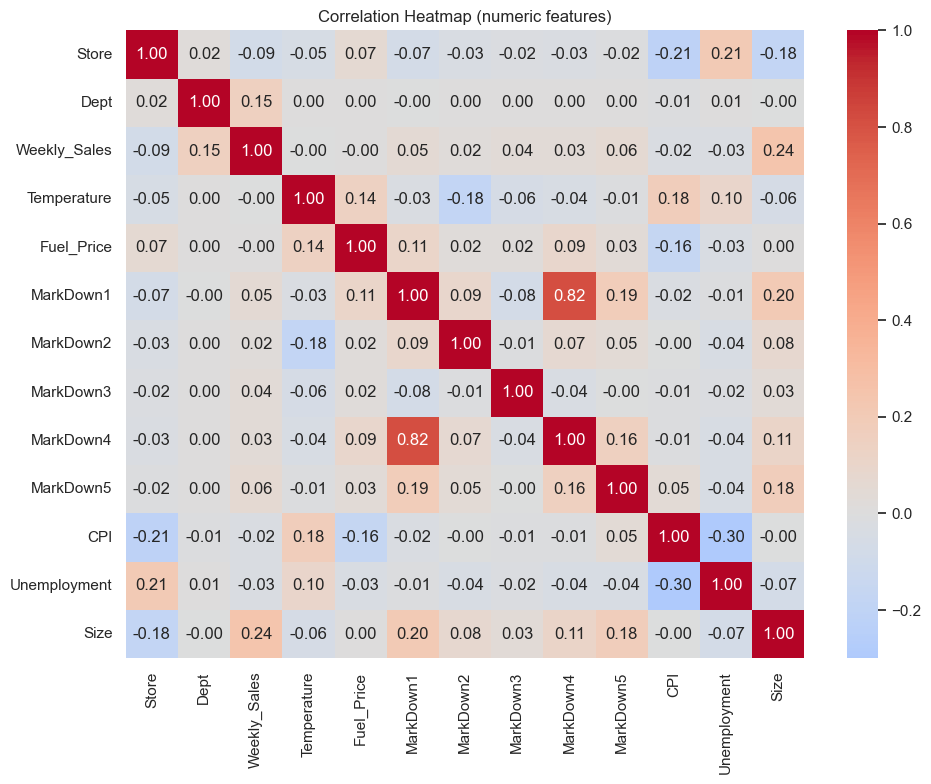

Store-level summary (top 10 by mean weekly sales):


,Store,Type,Size,mean,median,sum,count
19,20,A,203742,29508.301592,16249.780,3.013978e+08,10214
3,4,A,205863,29161.210415,15116.810,2.995440e+08,10272
13,14,A,200898,28784.851727,15208.805,2.889999e+08,10040
12,13,A,219622,27355.136891,14018.455,2.865177e+08,10474
1,2,A,202307,26898.070031,14333.530,2.753824e+08,10238
9,10,B,126512,26332.303819,13941.430,2.716177e+08,10315
26,27,A,204184,24826.984536,13625.950,2.538559e+08,10225
5,6,A,202505,21913.243624,13637.840,2.237561e+08,10211
0,1,A,151315,21710.543621,10289.375,2.224028e+08,10244
38,39,A,184109,21000.763562,11016.425,2.074455e+08,9878


Skip: Missing Temperature/Weekly_Sales/IsHoliday for multivariate grouping.
Avg weekly sales by markdown quartile (0..3):


,total_markdown,avg_weekly_sales
0,0,14252.521767
1,1,17473.991907
2,2,14381.075440
3,3,17817.442360


In [12]:
print("\nTask 6: Multivariate Analysis")
# 1) Correlation heatmap for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (numeric features)')
    plt.tight_layout()
    safe_plot_show()
else:
    print("Skip: Not enough numeric columns for correlation heatmap.")

# 2) Store-level sales using Type, Size, Weekly_Sales
if {'Store','Type','Size','Weekly_Sales'}.issubset(required_cols):
    store_summary = df.groupby(['Store','Type','Size'])['Weekly_Sales'].agg(['mean','median','sum','count']).reset_index()
    print("Store-level summary (top 10 by mean weekly sales):")
    display(store_summary.sort_values('mean', ascending=False).head(10))
else:
    print("Skip: Missing Store/Type/Size/Weekly_Sales for store-level summary.")

# 3) Weekly Sales vs Temperature vs Holiday_Flag (grouped summary)
if {'Temperature','Weekly_Sales','IsHoliday'}.issubset(required_cols):
    # Bin temperature into quartiles and show mean sales by holiday flag
    df_temp = df[['Temperature','Weekly_Sales','IsHoliday']].dropna()
    df_temp['temp_bin'] = pd.qcut(df_temp['Temperature'], q=4, duplicates='drop')
    grp = df_temp.groupby(['temp_bin','IsHoliday'])['Weekly_Sales'].agg(['mean','median','count']).reset_index()
    print("Grouped summary: Weekly Sales by Temperature bin and IsHoliday:")
    display(grp.head(12))
else:
    print("Skip: Missing Temperature/Weekly_Sales/IsHoliday for multivariate grouping.")


# 4) Markdown influence on sales (simple check)
markdown_cols = [c for c in df.columns if c.startswith('MarkDown')]
if len(markdown_cols)>0 and 'Weekly_Sales' in df.columns:
    df['total_markdown'] = df[markdown_cols].sum(axis=1).fillna(0)
    md_q = pd.qcut(df['total_markdown'].rank(method='first'), q=4, labels=False, duplicates='drop')
    md_summary = df.groupby(md_q)['Weekly_Sales'].mean().reset_index().rename(columns={'Weekly_Sales':'avg_weekly_sales'})
    print("Avg weekly sales by markdown quartile (0..3):")
    display(md_summary)
else:
    print("Skip: No MarkDown columns or Weekly_Sales missing for markdown analysis.")


Task 7: Time Series Analysis
Created year/month/week from Date.


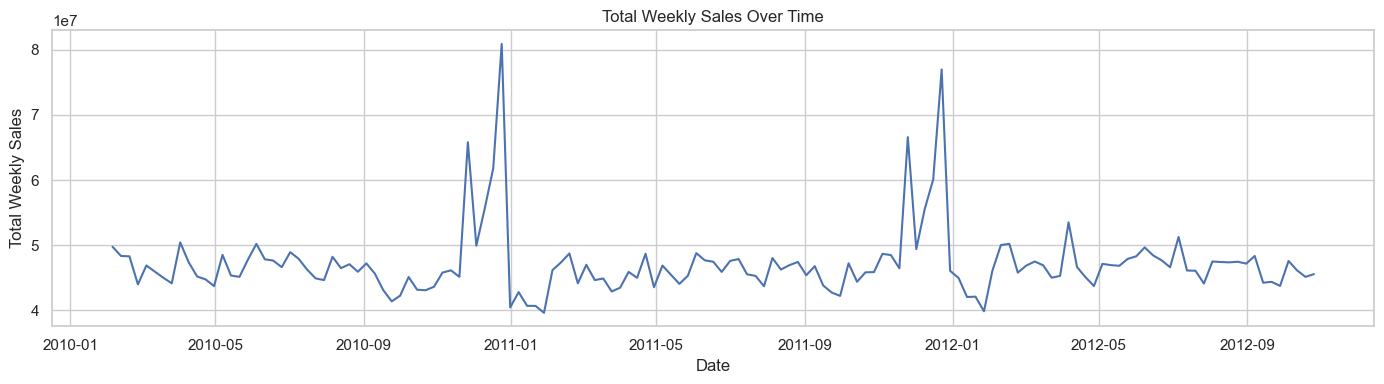

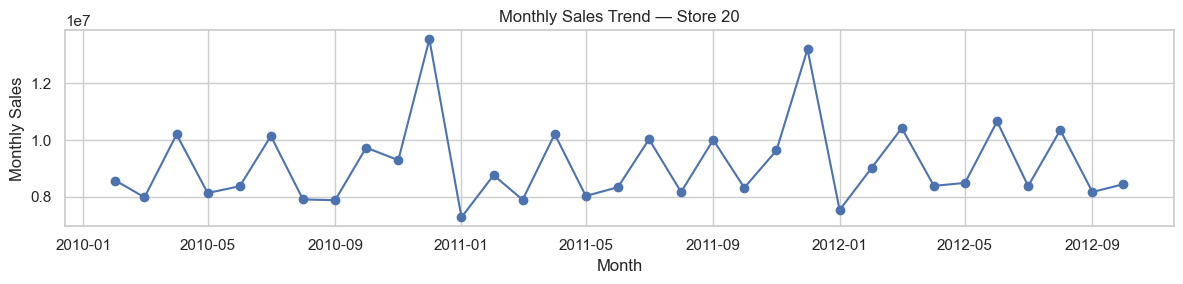

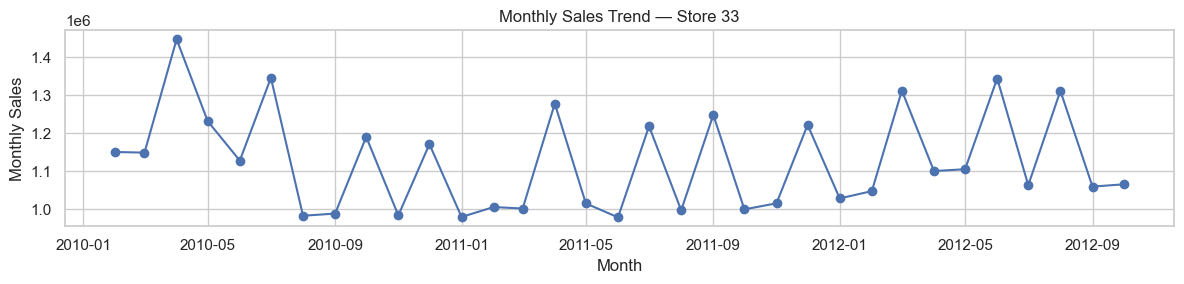

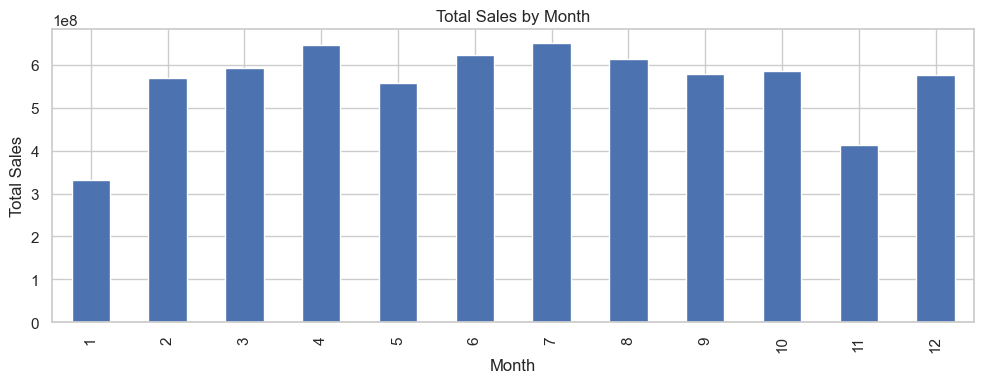

Months sorted by total sales (desc):
month
7    6.500010e+08
4    6.468598e+08
6    6.226299e+08
8    6.130902e+08
3    5.927859e+08
Name: Weekly_Sales, dtype: float64
Top departments with highest Nov/Dec sales (sample):


Dept
92    67484218.30
72    66978443.41
95    51838883.87
38    48550148.15
7     45025118.59
90    39140836.47
40    36156419.96
2     36018812.41
5     33677027.67
91    26268073.80
Name: Weekly_Sales, dtype: float64

In [13]:
print("\nTask 7: Time Series Analysis")
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    try:
        df['week'] = df['Date'].dt.isocalendar().week
    except Exception:
        df['week'] = df['Date'].dt.week
    print("Created year/month/week from Date.")
else:
    print("Skip: 'Date' column missing. Cannot create year/month/week.")

# 1) Plot total weekly sales over time
if {'Date','Weekly_Sales'}.issubset(required_cols):
    weekly_total = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
    plt.figure(figsize=(14,4))
    plt.plot(weekly_total['Date'], weekly_total['Weekly_Sales'])
    plt.title('Total Weekly Sales Over Time')
    plt.xlabel('Date'); plt.ylabel('Total Weekly Sales')
    plt.tight_layout()
    safe_plot_show()
else:
    print("Skip: Missing Date or Weekly_Sales for total weekly sales plot.")

# 2) Monthly sales trends for store with highest & lowest total sales
if {'Store','Weekly_Sales','year','month'}.issubset(df.columns):
    monthly = df.groupby(['Store','year','month'])['Weekly_Sales'].sum().reset_index()
    store_totals = monthly.groupby('Store')['Weekly_Sales'].sum()
    top_store = store_totals.idxmax(); low_store = store_totals.idxmin()
    for s in [top_store, low_store]:
        sub = monthly[monthly['Store']==s].sort_values(['year','month'])
        if not sub.empty:
            dates = pd.to_datetime(sub.assign(day=1)[['year','month','day']])
            plt.figure(figsize=(12,3))
            plt.plot(dates, sub['Weekly_Sales'], marker='o')
            plt.title(f'Monthly Sales Trend — Store {s}')
            plt.xlabel('Month'); plt.ylabel('Monthly Sales')
            plt.tight_layout()
            safe_plot_show()
else:
    print("Skip: Cannot compute monthly store trends (Store/year/month/Weekly_Sales missing).")

# 3) Seasonal patterns: Which months show peak sales?
if {'month','Weekly_Sales'}.issubset(df.columns):
    monthly_season = df.groupby('month')['Weekly_Sales'].sum().reindex(range(1,13), fill_value=0)
    plt.figure(figsize=(10,4)); monthly_season.plot(kind='bar'); plt.title('Total Sales by Month'); plt.xlabel('Month'); plt.ylabel('Total Sales'); plt.tight_layout(); safe_plot_show()
    print("Months sorted by total sales (desc):")
    print(monthly_season.sort_values(ascending=False).head())
else:
    print("Skip: Missing month or Weekly_Sales for seasonal analysis.")

# 4) Departments with seasonal demand (Nov/Dec example)
if {'Dept','month','Weekly_Sales'}.issubset(df.columns):
    dept_month = df.groupby(['Dept','month'])['Weekly_Sales'].sum().reset_index()
    dec_peaks = dept_month[dept_month['month'].isin([11,12])].groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
    print("Top departments with highest Nov/Dec sales (sample):")
    display(dec_peaks)
else:
    print("Skip: Dept/month/Weekly_Sales missing for dept seasonality.")

In [14]:
print("\nTask 8: Feature Engineering")
# 8A: Create new columns
if len(markdown_cols)>0:
    df['discount_effect'] = df[markdown_cols].sum(axis=1).fillna(0)
else:
    df['discount_effect'] = 0
if 'month' in df.columns:
    df['is_peak_season'] = df['month'].isin([11,12])
else:
    df['is_peak_season'] = False
if {'Weekly_Sales','Size'}.issubset(required_cols):
    df['normalized_sales'] = df['Weekly_Sales'] / df['Size'].replace({0:np.nan})
else:
    df['normalized_sales'] = np.nan
print("Feature engineering columns created: discount_effect, is_peak_season, normalized_sales (if possible).")
# 8B: Filters using created columns
peak_high_sales = df[(df.get('is_peak_season')==True) & (df.get('Weekly_Sales',0) > 50000)] if 'Weekly_Sales' in df.columns else pd.DataFrame()
print("Peak-season transactions with Weekly_Sales>50k:", peak_high_sales.shape[0])
top10_norm = pd.DataFrame()
if 'normalized_sales' in df.columns and df['normalized_sales'].notna().any():
    th90 = df['normalized_sales'].quantile(0.9)
    top10_norm = df[df['normalized_sales'] >= th90]
    print("Number of rows in top 10% normalized_sales:", top10_norm.shape[0])
else:
    print("normalized_sales not available or all NaN.")

# Departments where discount_effect > median discount
depts_discount = []
if 'discount_effect' in df.columns and 'Dept' in df.columns:
    med_de = df['discount_effect'].median()
    depts_discount = df[df['discount_effect'] > med_de]['Dept'].unique()
    print("Departments with discount_effect > median (sample):", list(depts_discount)[:10])
else:
    print("Cannot compute departments with discount_effect > median.")

# Complex filter:
cond_filter = pd.DataFrame()
if {'Temperature','Fuel_Price','Weekly_Sales','is_peak_season'}.issubset(df.columns):
    cond_filter = df[
        (df['Temperature'] < 40) &
        (df['Fuel_Price'] > 3.5) &
        (df['Weekly_Sales'].between(20000, 60000)) &
        (df['is_peak_season'] == True)
    ]
    print("Rows matching complex filter:", len(cond_filter))
else:
    print("Missing columns for complex multi-condition filter.")

# 8C: Grouping & Business Insights

# Monthly average sales per store
if {'Store','year','month','Weekly_Sales'}.issubset(df.columns):
    monthly_avg_per_store = df.groupby(['Store','year','month'])['Weekly_Sales'].sum().groupby(level=0).mean().sort_values(ascending=False)
    print("Top 10 stores by avg monthly sales:")
    display(monthly_avg_per_store.head(10))
else:
    print("Cannot compute monthly avg sales per store (missing columns).")

# Total discount_effect per department
if 'discount_effect' in df.columns and 'Dept' in df.columns:
    total_discount_per_dept = df.groupby('Dept')['discount_effect'].sum().sort_values(ascending=False)
    print("Top 10 Depts by total discount_effect:")
    display(total_discount_per_dept.head(10))
else:
    print("Cannot compute discount effect per dept (missing columns).")

# Department with highest normalized_sales
if 'normalized_sales' in df.columns and 'Dept' in df.columns and df['normalized_sales'].notna().any():
    dept_norm = df.groupby('Dept')['normalized_sales'].mean().sort_values(ascending=False)
    print("Department with highest avg normalized_sales:")
    display(dept_norm.head(1))
else:
    print("Cannot compute department normalized_sales (missing columns or all NaN).")

# revenue_potential = Weekly_Sales * 52; Top 10 stores by revenue potential
if 'Weekly_Sales' in df.columns:
    df['revenue_potential'] = df['Weekly_Sales'] * 52
    revenue_per_store = df.groupby('Store')['revenue_potential'].sum().sort_values(ascending=False)
    print("Top 10 stores by revenue potential:")
    display(revenue_per_store.head(10))
else:
    print("Cannot compute revenue potential (Weekly_Sales missing).")


Task 8: Feature Engineering
Feature engineering columns created: discount_effect, is_peak_season, normalized_sales (if possible).
Peak-season transactions with Weekly_Sales>50k: 5071
Number of rows in top 10% normalized_sales: 42157
Departments with discount_effect > median (sample): [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Rows matching complex filter: 541
Top 10 stores by avg monthly sales:


Store
20    9.133266e+06
4     9.077089e+06
14    8.757573e+06
13    8.682355e+06
2     8.344922e+06
10    8.230840e+06
27    7.692604e+06
6     6.780489e+06
1     6.739479e+06
39    6.286229e+06
Name: Weekly_Sales, dtype: float64

Top 10 Depts by total discount_effect:


Dept
1     84110412.09
2     84110412.09
3     84110412.09
4     84110412.09
7     84110412.09
8     84110412.09
16    84110412.09
13    84110412.09
10    84110412.09
14    84110412.09
Name: discount_effect, dtype: float64

Department with highest avg normalized_sales:


Dept
92    0.641547
Name: normalized_sales, dtype: float64

Top 10 stores by revenue potential:


Store
20    1.567269e+10
4     1.557629e+10
14    1.502800e+10
13    1.489892e+10
2     1.431989e+10
10    1.412412e+10
27    1.320051e+10
6     1.163532e+10
1     1.156495e+10
39    1.078717e+10
Name: revenue_potential, dtype: float64